<a href="https://www.kaggle.com/code/devikasanthosh04/linear-regression?scriptVersionId=177582354" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


Loading and reading the data using pandas.

In [2]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
# To evaluate the size of the data set
df.shape

(30, 3)

In [4]:
#checking the statistics
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [5]:
#checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [6]:
#checking for null values
df.isna().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

Since we are having only 2 parameters, the first step is to know how they are related.The best way is to plot them with the help of matplotlib.

In [7]:
import matplotlib.pyplot as plt

The best way to know the distribution of the variables is plotting via histogram

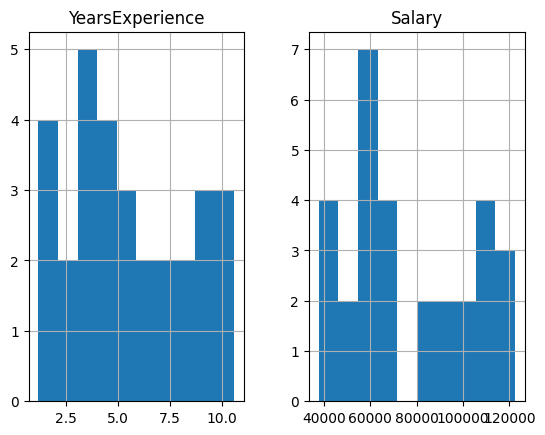

In [8]:
attribute = df[['YearsExperience','Salary']]
attribute.hist()
plt.show()

Scatter plot will help us to know whether the variables are linearly related or not

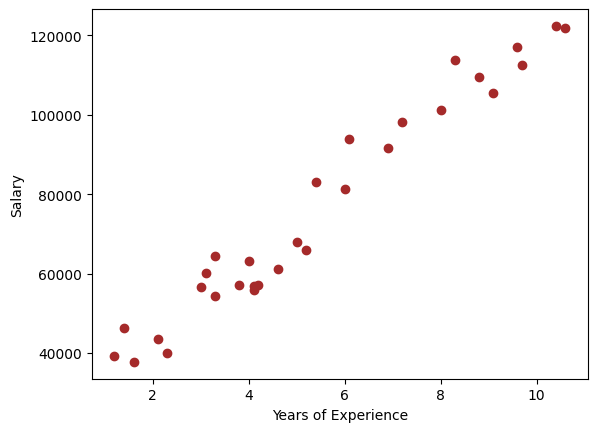

In [9]:
plt.scatter(attribute.YearsExperience, attribute.Salary,  color='brown')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function.

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = attribute[msk]
test = attribute[~msk]

Using sklearn package to model data.

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['YearsExperience']])
train_y = np.asanyarray(train[['Salary']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9184.79788224]]
Intercept:  [25378.59101753]


We can plot the fit line over the data:

Text(0, 0.5, 'Salary')

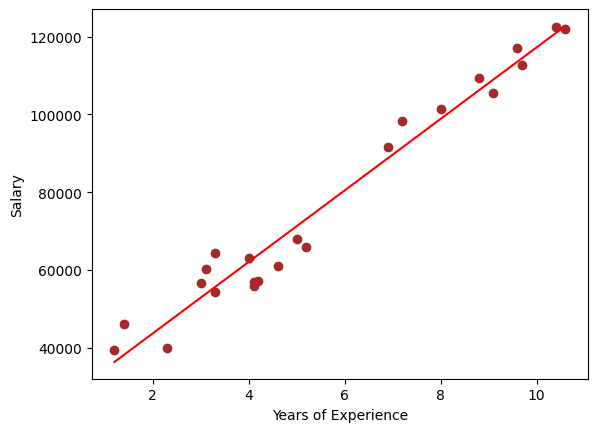

In [12]:
plt.scatter(train.YearsExperience, train.Salary,  color='brown')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

In [13]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['YearsExperience']])
test_y = np.asanyarray(test[['Salary']])
prediction = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , prediction) )

Mean absolute error: 5756.94
Residual sum of squares (MSE): 55557964.00
R2-score: 0.92


In summary, an MAE of 4547.63 indicates that, on average, the model's predictions are off by approximately 4547.63 units from the actual values. The MSE of 36,213,501.54 shows the average squared difference between predictions and actual values. The high R2 score of 0.96 indicates that the model is a good fit for the data and explains a significant portion of the variance in the dependent variable.